In [85]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import torch.nn.functional as F
import torch.nn as nn
import torch
import const
import numpy as np
from sklearn.datasets import make_blobs
from torch.utils.data import DataLoader, Dataset
from eval import dim_reduce
from sklearn.preprocessing import normalize

In [95]:
x = torch.tensor([1, 2, 3, 4, 1, 2, 2, 3, 3, 3])
x.mode().values.item()

3

In [81]:
import matplotlib.pyplot as plt

x, y = make_blobs([200_000, 30_000], 768, cluster_std=3)
x = normalize(x)

x.shape

(230000, 768)

In [82]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)

cluster_labels = gm.fit_predict(x)

In [84]:
cluster_probs = gm.predict_proba(x)
cluster_probs

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Dimension Reducing...


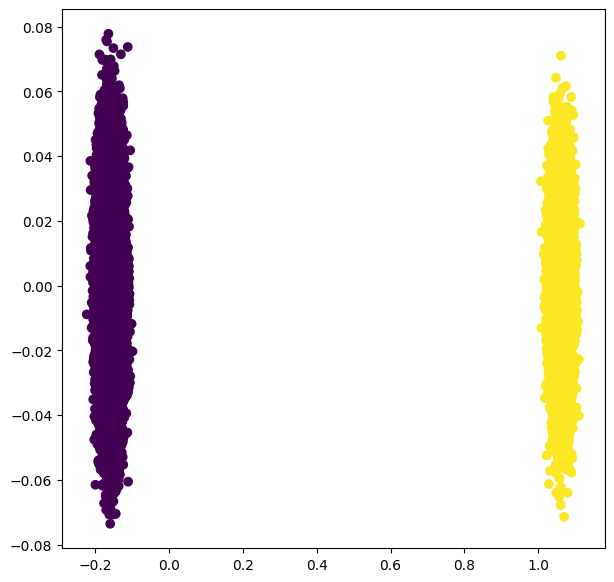

In [83]:
pca_x = dim_reduce(x, function='pca')
plt.figure(figsize=(7, 7))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=cluster_labels)
plt.show()

Dimension Reducing...


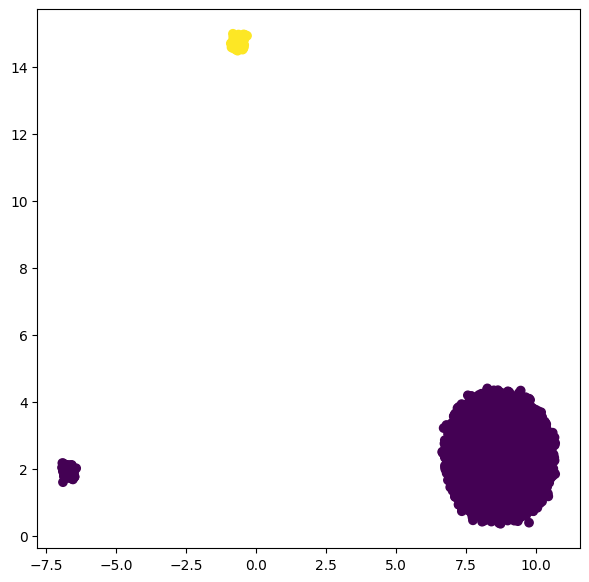

In [69]:
umap_x = dim_reduce(x, function='umap')
plt.figure(figsize=(7, 7))
plt.scatter(umap_x[:, 0], umap_x[:, 1], c=cluster_labels)
plt.show()

Dimension Reducing...


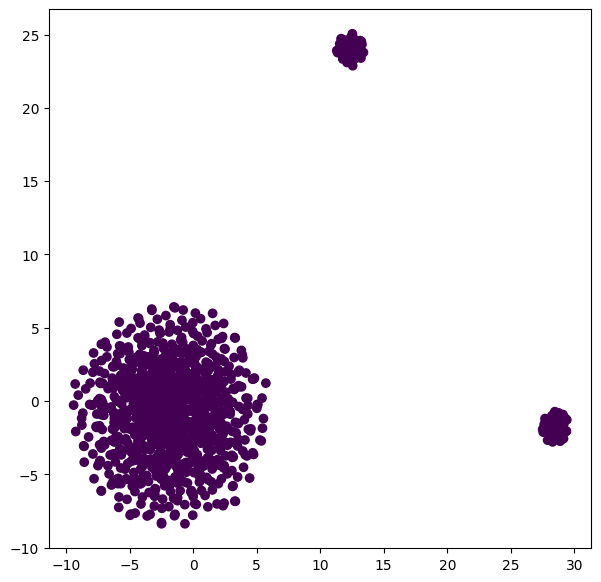

In [63]:
tsne_x = dim_reduce(x, function='tsne')
plt.figure(figsize=(7, 7))
plt.scatter(tsne_x[:, 0], tsne_x[:, 1], c=cluster_labels)
plt.show()